In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
# Loading data
data = pd.read_csv('D:/Datasets/flood dataset - kaggle/flood prediction/datasets_1686_3183_rainfall in india 1901-2015.csv',
                  na_values = ['na', '--'])
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [3]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

None

In [4]:
# To check out the number of null
display(data.isnull().sum())

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

In [5]:
# Filling NULL with mean of each values of column
data['JAN'].fillna((data['JAN'].mean()), inplace=True)
data['FEB'].fillna((data['FEB'].mean()), inplace=True)
data['MAR'].fillna((data['MAR'].mean()), inplace=True)
data['APR'].fillna((data['APR'].mean()), inplace=True)
data['MAY'].fillna((data['MAY'].mean()), inplace=True)
data['JUN'].fillna((data['JUN'].mean()), inplace=True)
data['JUL'].fillna((data['JUL'].mean()), inplace=True)
data['AUG'].fillna((data['AUG'].mean()), inplace=True)
data['SEP'].fillna((data['SEP'].mean()), inplace=True)
data['OCT'].fillna((data['OCT'].mean()), inplace=True)
data['DEC'].fillna((data['DEC'].mean()), inplace=True)
data['ANNUAL'].fillna((data['ANNUAL'].mean()), inplace=True)
data['Jan-Feb'].fillna((data['Jan-Feb'].mean()), inplace=True)
data['Mar-May'].fillna((data['Mar-May'].mean()), inplace=True)
data['Jun-Sep'].fillna((data['Jun-Sep'].mean()), inplace=True)
data['Oct-Dec'].fillna((data['Oct-Dec'].mean()), inplace=True)

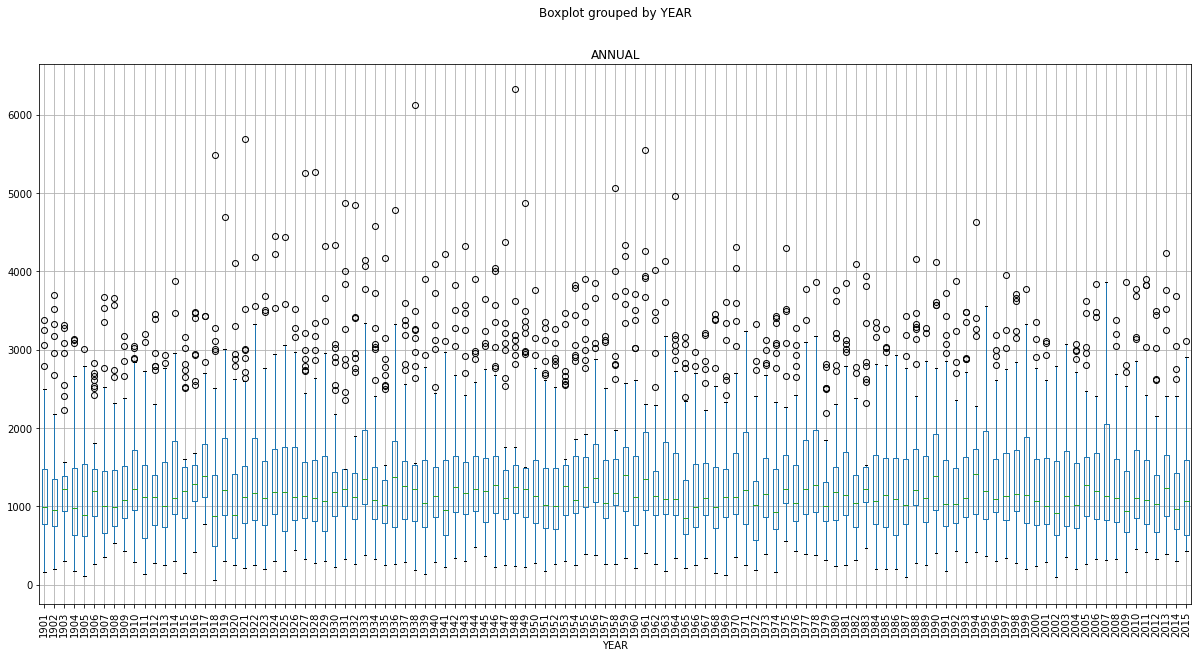

In [6]:
data.boxplot(column='ANNUAL', by='YEAR', rot=90, fontsize=10, figsize=(20,10))
plt.show()

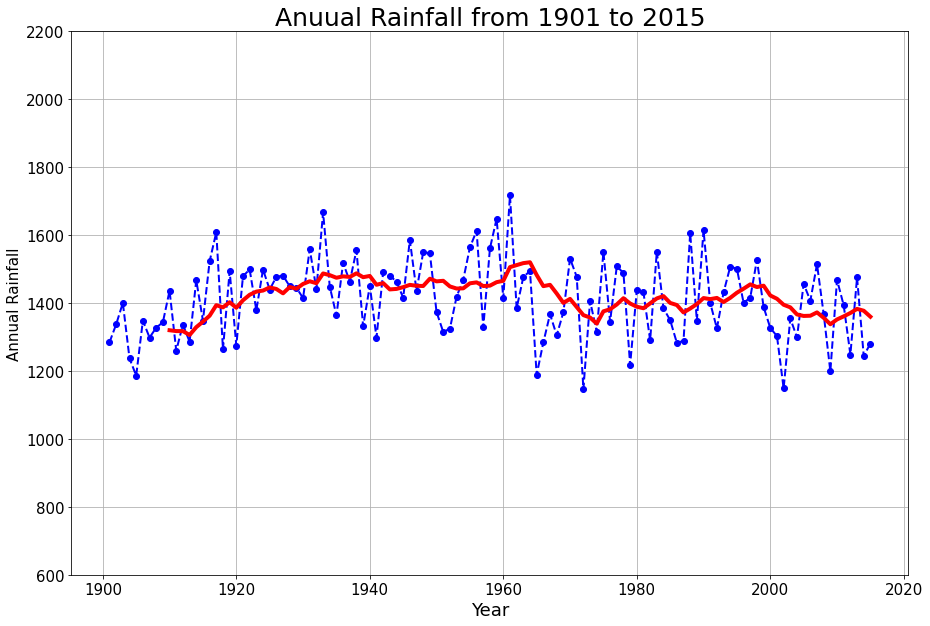

In [7]:
# Checking annual rainfal over the period 
ax = data.groupby('YEAR').mean()['ANNUAL'].plot(ylim=(600, 2200), color='b', marker='o', linestyle='--', 
                                                linewidth=2, figsize=(15,10))
data['Ranifall'] = data.groupby('YEAR').mean()['ANNUAL'].rolling(10).mean()
data.Ranifall.plot(color='r', linewidth=4)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Annual Rainfall', fontsize=15)
plt.title('Anuual Rainfall from 1901 to 2015', fontsize=25)
ax.tick_params(labelsize=15)
plt.grid()
plt.ioff()

# Seasonal Rainfall

C:\Users\VHD\anaconda3\envs\SI\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


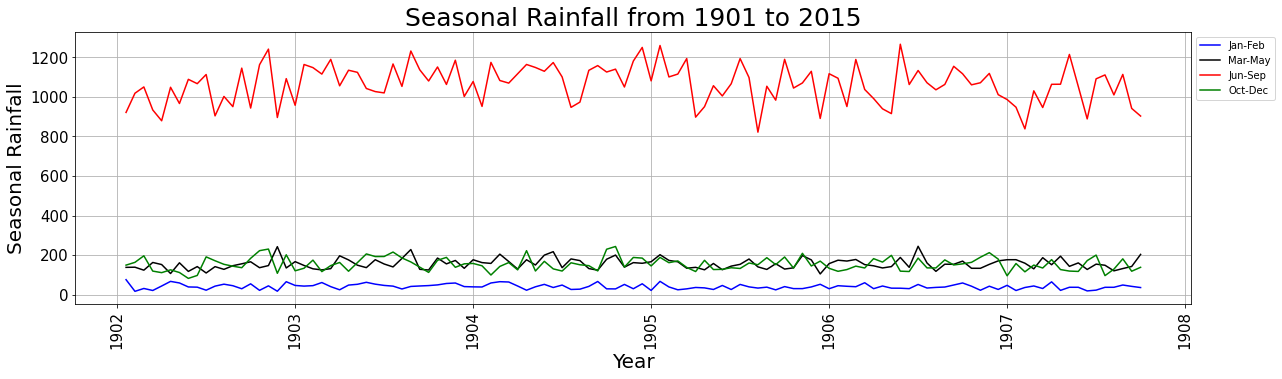

In [8]:
TotalSize = plt.figure(figsize=(20,5))
s1 = data[['YEAR', 'Jan-Feb']].groupby('YEAR').mean()
s2 = data[['YEAR', 'Mar-May']].groupby('YEAR').mean()
s3 = data[['YEAR', 'Jun-Sep']].groupby('YEAR').mean()
s4 = data[['YEAR', 'Oct-Dec']].groupby('YEAR').mean()
ax = TotalSize.add_subplot(111)
ax.set_xticklabels(s1.index, rotation = 90)
ax.plot(s1, '-b')
ax.plot(s2, '-k')
ax.plot(s3, '-r')
ax.plot(s4, '-g')
plt.xlabel('Year',fontsize=20)
plt.ylabel('Seasonal Rainfall', fontsize=20)
plt.title('Seasonal Rainfall from 1901 to 2015',fontsize=25)
ax.tick_params(labelsize=15)
plt.grid()
plt.ioff()
ax.legend(['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec'], loc = "upper left", bbox_to_anchor = (1,1))
plt.show()

# Monthly Rainfall

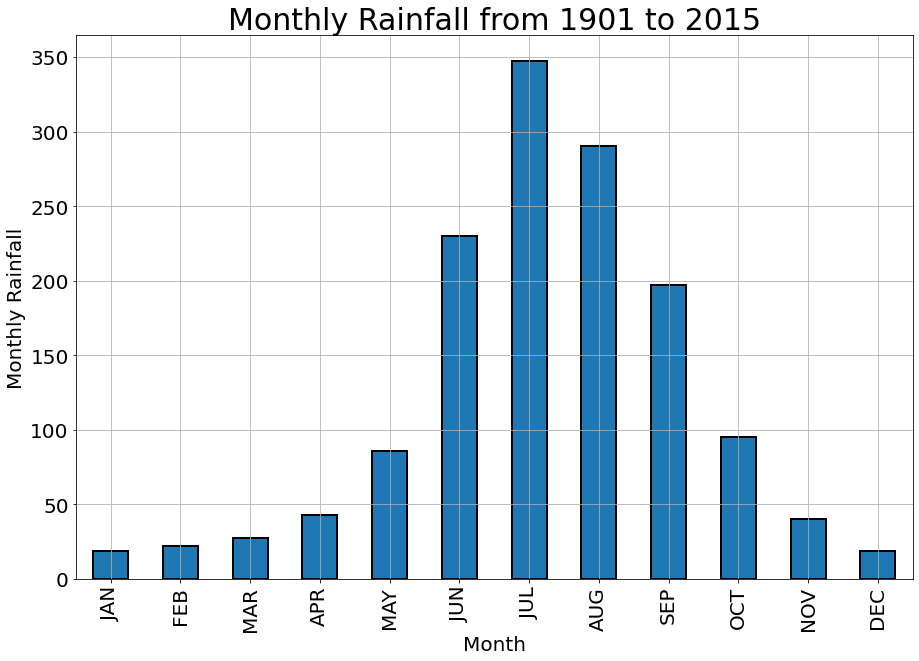

In [9]:
ax = data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC']].mean().plot.bar(width=0.5,
                                                                                                               edgecolor='k',
                                                                                                              align='center',
                                                                                                              linewidth=2,
                                                                                                              figsize=(15,10))

plt.xlabel('Month', fontsize=20)
plt.ylabel('Monthly Rainfall', fontsize=20)
plt.title('Monthly Rainfall from 1901 to 2015', fontsize=30)
ax.tick_params(labelsize=20)
plt.grid()
plt.show()